# CS 352 - Introduction to Reinforcement Learning
## Course Project - Code

**Team Members:**
1. Mohammed Haider Abbas - 06418
2. Muhammad Ahsan - 06371

## About the Project

**Choosen Option: Option 2**

**Option 2:** 
Choose one of the two algorithms, SARSA and Q-learning, run it for various values of α and compare the two in terms of:
- computational efficiency, i.e., the time taken to converge;
- maximizing reward: Run the learned policies for each α value for various starting states and calculate the average reward to see which α value results in the most average reward

**Choosen Algorithm: Q-Learning**



## Prerequisites
Install the following libraries if not installed already and import them.

In [2]:
# pip install gym
# pip install cmake 'gym[atari]' scipy

In [3]:
import gym
import numpy as np
import random
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import clear_output
from time import sleep

## Functions for creating Taxi environment

In [4]:
# runs the taxi environment animations as a gif
def run_animation(experience_buffer):
    """Function to run animation"""
    time_lag = 0.05  # Delay (in s) between frames
    for experience in experience_buffer:
        # Plot frame
        clear_output(wait=True)
        plt.imshow(experience['frame'])
        plt.axis('off')
        plt.show()

        # Print console output
        print(f"Episode: {experience['episode']}/{experience_buffer[-1]['episode']}")
        print(f"Epoch: {experience['epoch']}/{experience_buffer[-1]['epoch']}")
        print(f"State: {experience['state']}")
        print(f"Action: {experience['action']}")
        print(f"Reward: {experience['reward']}")

        # Pauze animation
        sleep(time_lag)


# stores the taxi environment as a gif in the current directory
def store_episode_as_gif(experience_buffer, path='./', filename='animation2.gif'):
    """Store episode as gif animation"""
    fps = 5   # Set framew per seconds
    dpi = 30  # Set dots per inch
    interval = 50  # Interval between frames (in ms)

    # Retrieve frames from experience buffer
    frames = []
    for experience in experience_buffer:
        frames.append(experience['frame'])

    # Fix frame size
    plt.figure(figsize=(frames[0].shape[1] / dpi, frames[0].shape[0] / dpi), dpi=dpi)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    # Generate animation
    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval=interval)

    # Save output as gif
    anim.save(path + filename, writer='imagemagick', fps=fps)

## Taxi Environment initialization

State space: Discrete(500)
Action space: Discrete(6)
State: 82
Action: 0
Action mask: [1 0 0 1 0 0]
Reward: -1


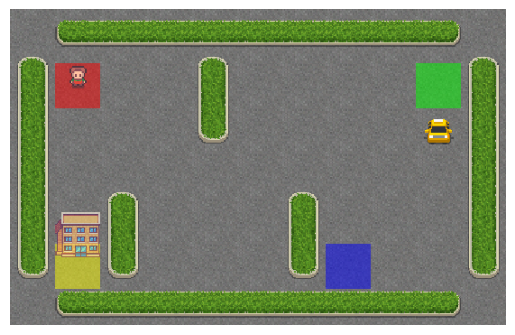

In [5]:
"""Initialize and validate the environment"""
env = gym.make("Taxi-v3", render_mode="rgb_array").env
state, _ = env.reset()

# Print dimensions of state and action space
print("State space: {}".format(env.observation_space))
print("Action space: {}".format(env.action_space))

# Sample random action
action = env.action_space.sample(env.action_mask(state))
next_state, reward, done, _, _ = env.step(action)

# Print output
print("State: {}".format(state))
print("Action: {}".format(action))
print("Action mask: {}".format(env.action_mask(state)))
print("Reward: {}".format(reward))

# Render and plot an environment frame
frame = env.render()
plt.imshow(frame)
plt.axis("off")
plt.show()

## Simulation with random agent - Untrained

In [ ]:
# """Simulation with random agent"""
# epoch = 0
# num_failed_dropoffs = 0
# experience_buffer = []
# cum_reward = 0

# done = False

# state, _ = env.reset()

# while not done:
#     # Sample random action
#     action = env.action_space.sample()
#     #action = env.action_space.sample(env.action_mask(state))

#     state, reward, done, _, _ = env.step(action)
#     cum_reward += reward

#     # Store experience in dictionary
#     experience_buffer.append({
#         "frame": env.render(),
#         "episode": 1,
#         "epoch": epoch,
#         "state": state,
#         "action": action,
#         "reward": cum_reward,
#         }
#     )

#     if reward == -10:
#         num_failed_dropoffs += 1

#     epoch += 1

# # Run animation and print console output
# run_animation(experience_buffer)

# print("# epochs: {}".format(epoch))
# print("# failed drop-offs: {}".format(num_failed_dropoffs))

In [6]:
# Function to calculate run time
# Function which takes in start and end times, formats and returns the time in appropriate unit
def run_time(start_time, end_time):
    running_time = end_time - start_time
    timedelta_seconds = running_time.total_seconds()
    # seconds_form = "{:.8f}".format(float(timedelta_seconds))
    mili_seconds_form = running_time.total_seconds() * 1000
    # return seconds_form
    return mili_seconds_form

## Training the agent using Q-Learning

In [7]:
# %%time --> to get running time of cell 

"""Training the agent"""
# q_table = np.zeros([env.observation_space.n, env.action_space.n])

# Hyperparameters
gamma = 1.0  # Discount rate
epsilon = 0.1  # Exploration rate
num_episodes = 10000  # Number of episodes

# Experimenting over the values of Alpha
# alpha = 0.1  # Learning rate
# alpha = 0.5  # Learning rate
alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] # Learning rates

# passing only alpha since all other parameters are hyperparameters and we are required to run it for various values of alpha
def agent_training(alpha):

    q_table = np.zeros([env.observation_space.n, env.action_space.n])
    
    for episode in range(1, num_episodes+1):
        # Reset environment
        state, info = env.reset()
        epoch = 0 
        num_failed_dropoffs = 0
        done = False
        cum_reward = 0

        while not done:
            
            if random.uniform(0, 1) < epsilon:
                "Basic exploration [~0.47m]"
                action = env.action_space.sample() # Sample random action (exploration)
                
                "Exploration with action mask [~1.52m]"
            # action = env.action_space.sample(env.action_mask(state)) "Exploration with action mask"
            else:      
                "Exploitation with action mask [~1m52s]"
            # action_mask = np.where(info["action_mask"]==1,0,1) # invert
            # masked_q_values = np.ma.array(q_table[state], mask=action_mask, dtype=np.float32)
            # action = np.ma.argmax(masked_q_values, axis=0)

                "Exploitation with random tie breaker [~1m19s]"
            #  action = np.random.choice(np.flatnonzero(q_table[state] == q_table[state].max()))
                
                "Basic exploitation [~47s]"
                action = np.argmax(q_table[state]) # Select best known action (exploitation)
    
            next_state, reward, done, _ , info = env.step(action) 

            cum_reward += reward
            
            old_q_value = q_table[state, action]
            next_max = np.max(q_table[next_state])
            
            new_q_value = (1 - alpha) * old_q_value + alpha * (reward + gamma * next_max)
            
            q_table[state, action] = new_q_value
            
            if reward == -10:
                num_failed_dropoffs += 1

            state = next_state
            epoch += 1
            
            # total_epochs[episode-1] = epoch
            # cum_rewards[episode-1] = cum_reward

        # if episode % 100 == 0:
            # clear_output(wait=True)
            # print(f"Episode #: {episode}")
            # print("===Training completed.===\n")
            # print(f"== Training completed for alpha = {alpha} ==")
            
    print(f"== Training completed for alpha = {alpha} ==")

    return cum_reward, q_table

# print(agent_training(alphas[4]))
# reward, q_table = agent_training(alphas[4])

# print(reward)
# print(q_table)

# lst_alphas_x = alphas
# lst_rewards_y = []

# lst_time_y = []

initial_rewards, q_tables = [], []

for alpha in alphas:
    reward, q_table_ = agent_training(alpha)
    initial_rewards.append(reward)
    q_tables.append(q_table_)




# print(f"=== Training completed for alpha = {alpha} ===")

# # Output for plots
# cum_rewards = np.zeros([num_episodes])
# total_epochs = np.zeros([num_episodes])

# for episode in range(1, num_episodes+1):
#     # Reset environment
#     state, info = env.reset()
#     epoch = 0 
#     num_failed_dropoffs = 0
#     done = False
#     cum_reward = 0

#     while not done:
        
#         if random.uniform(0, 1) < epsilon:
#             "Basic exploration [~0.47m]"
#             action = env.action_space.sample() # Sample random action (exploration)
            
#             "Exploration with action mask [~1.52m]"
#           # action = env.action_space.sample(env.action_mask(state)) "Exploration with action mask"
#         else:      
#             "Exploitation with action mask [~1m52s]"
#            # action_mask = np.where(info["action_mask"]==1,0,1) # invert
#            # masked_q_values = np.ma.array(q_table[state], mask=action_mask, dtype=np.float32)
#            # action = np.ma.argmax(masked_q_values, axis=0)

#             "Exploitation with random tie breaker [~1m19s]"
#           #  action = np.random.choice(np.flatnonzero(q_table[state] == q_table[state].max()))
            
#             "Basic exploitation [~47s]"
#             action = np.argmax(q_table[state]) # Select best known action (exploitation)
 
#         next_state, reward, done, _ , info = env.step(action) 

#         cum_reward += reward
        
#         old_q_value = q_table[state, action]
#         next_max = np.max(q_table[next_state])
        
#         new_q_value = (1 - alpha) * old_q_value + alpha * (reward + gamma * next_max)
        
#         q_table[state, action] = new_q_value
        
#         if reward == -10:
#             num_failed_dropoffs += 1

#         state = next_state
#         epoch += 1
        
#         total_epochs[episode-1] = epoch
#         cum_rewards[episode-1] = cum_reward

#     if episode % 100 == 0:
#         clear_output(wait=True)
#         print(f"Episode #: {episode}")

# print("\n")
# print("===Training completed.===\n")

# # Plots
# # Plot reward convergence
# plt.title("Cumulative reward per episode")
# plt.xlabel("Episode")
# plt.ylabel("Cumulative reward")
# plt.plot(cum_rewards)
# plt.show()

# # Plot epoch convergence
# plt.title("# epochs per episode")
# plt.xlabel("Episode")
# plt.ylabel("# epochs")
# plt.plot(total_epochs)
# plt.show()

== Training completed for alpha = 0.1 ==
== Training completed for alpha = 0.2 ==
== Training completed for alpha = 0.3 ==
== Training completed for alpha = 0.4 ==
== Training completed for alpha = 0.5 ==
== Training completed for alpha = 0.6 ==
== Training completed for alpha = 0.7 ==
== Training completed for alpha = 0.8 ==
== Training completed for alpha = 0.9 ==


## Performance test

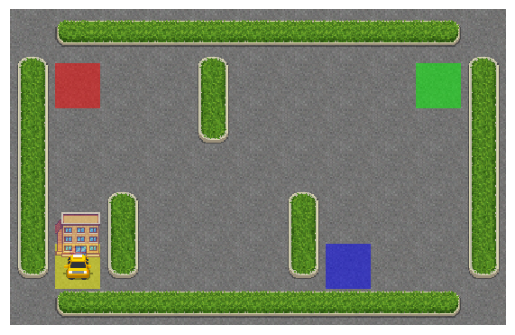

Episode: 1/1
Epoch: 14/14
State: 410
Action: 5
Reward: 7


Test results after 1 episodes:
Mean # epochs per episode: 15.0
Mean # failed drop-offs per episode: 0.0


In [8]:
"""Test policy performance after training"""

def q_learning_implement(q_table, alpha):
    num_epochs = 0
    total_failed_deliveries = 0
    num_episodes = 1
    experience_buffer = []
    store_gif = True

    print(f"For alpha = {alpha}")

    for episode in range(1, num_episodes+1):
        # Initialize experience buffer

        my_env = env.reset()
        state = my_env[0]
        epoch = 1 
        num_failed_deliveries =0
        cum_reward = 0
        done = False

        while not done:
            action = np.argmax(q_table[state])
            state, reward, done, _, _ = env.step(action)
            cum_reward += reward

            if reward == -10:
                num_failed_deliveries += 1

            # Store rendered frame in animation dictionary
            experience_buffer.append({
                'frame': env.render(),
                'episode': episode,
                'epoch': epoch,
                'state': state,
                'action': action,
                'reward': cum_reward
                }
            )

            epoch += 1

        total_failed_deliveries += num_failed_deliveries
        num_epochs += epoch

        if store_gif:
            store_episode_as_gif(experience_buffer)

    # Run animation and print output
    run_animation(experience_buffer)

    # Print final results
    print("\n") 
    print(f"Test results after {num_episodes} episodes:")
    print(f"Mean # epochs per episode: {num_epochs / num_episodes}")
    print(f"Mean # failed drop-offs per episode: {total_failed_deliveries / num_episodes}")

    return cum_reward


lst_alphas_x = alphas.copy()
lst_rewards_y = []
lst_time_y = []

for iteration in range(9):
    q_table = q_tables[iteration]
    alpha = lst_alphas_x[iteration]
    start_time = datetime.now()
    reward = q_learning_implement(q_table, alpha)
    end_time = datetime.now()
    runtime = run_time(start_time, end_time)
    lst_rewards_y.append(reward)
    lst_time_y.append(runtime)


# num_epochs = 0
# total_failed_deliveries = 0
# num_episodes = 1
# experience_buffer = []
# store_gif = True

# for episode in range(1, num_episodes+1):
#     # Initialize experience buffer

#     my_env = env.reset()
#     state = my_env[0]
#     epoch = 1 
#     num_failed_deliveries =0
#     cum_reward = 0
#     done = False

#     while not done:
#         action = np.argmax(q_table[state])
#         state, reward, done, _, _ = env.step(action)
#         cum_reward += reward

#         if reward == -10:
#             num_failed_deliveries += 1

#         # Store rendered frame in animation dictionary
#         experience_buffer.append({
#             'frame': env.render(),
#             'episode': episode,
#             'epoch': epoch,
#             'state': state,
#             'action': action,
#             'reward': cum_reward
#             }
#         )

#         epoch += 1

#     total_failed_deliveries += num_failed_deliveries
#     num_epochs += epoch

#     if store_gif:
#         store_episode_as_gif(experience_buffer)

# # Run animation and print output
# run_animation(experience_buffer)

# # Print final results
# print("\n") 
# print(f"Test results after {num_episodes} episodes:")
# print(f"Mean # epochs per episode: {num_epochs / num_episodes}")
# print(f"Mean # failed drop-offs per episode: {total_failed_deliveries / num_episodes}")

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
[1230.5159999999998, 2623.8700000000003, 1204.465, 1905.872, 1366.813, 2070.4060000000004, 2744.7560000000003, 1403.353, 2418.716]
[14, 6, 14, 10, 13, 9, 5, 13, 7]


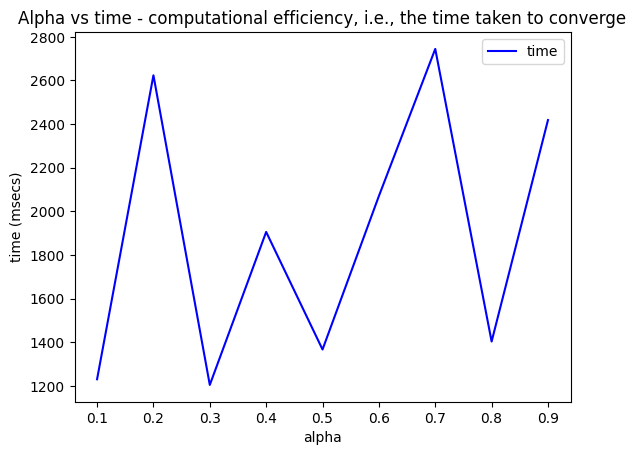

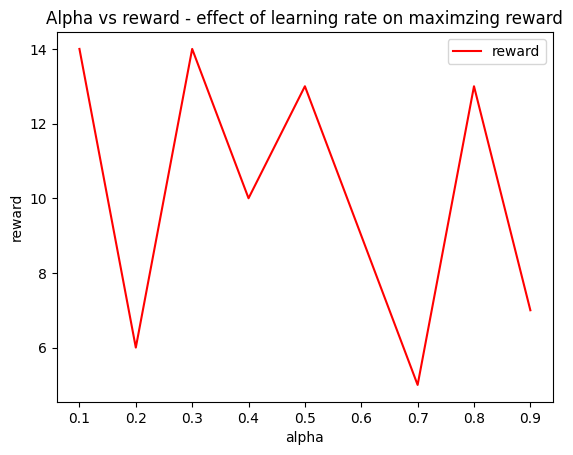

In [9]:
# Plotting graphs

print(lst_alphas_x)
print(lst_time_y)
print(lst_rewards_y)


plt.plot(lst_alphas_x, lst_time_y, color='blue', label='time')
plt.xlabel('alpha')
plt.ylabel('time (msecs)')
plt.legend()
plt.title('Alpha vs time - computational efficiency, i.e., the time taken to converge')
plt.show()

plt.plot(lst_alphas_x, lst_rewards_y, color='red', label='reward')
plt.xlabel('alpha')
plt.ylabel('reward')
plt.legend()
plt.title('Alpha vs reward - effect of learning rate on maximzing reward')
plt.show()
